In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("C:\\Users\\mvnvi\\Downloads\\covid_19_clean_complete.csv",parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)
df_confirmed=pd.read_csv("C:\\Users\\mvnvi\\Downloads\\time_series_covid19_confirmed_global.csv")
df_recovered=pd.read_csv("C:\\Users\\mvnvi\\Downloads\\time_series_covid19_recovered_global.csv")
df_deaths=pd.read_csv("C:\\Users\\mvnvi\\Downloads\\time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)



In [1]:
pip install --upgrade prophet

Note: you may need to restart the kernel to use updated packages.


In [12]:
from prophet import Prophet

In [13]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [14]:
confirmed.columns = ['ds' , 'y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [16]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

20:18:24 - cmdstanpy - INFO - Chain [1] start processing
20:18:24 - cmdstanpy - INFO - Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [18]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674387e+07,1.656984e+07,1.691370e+07
191,2020-07-31,1.695904e+07,1.679730e+07,1.711211e+07
192,2020-08-01,1.716673e+07,1.699410e+07,1.734251e+07
193,2020-08-02,1.736428e+07,1.717339e+07,1.754086e+07
194,2020-08-03,1.755891e+07,1.735908e+07,1.775539e+07


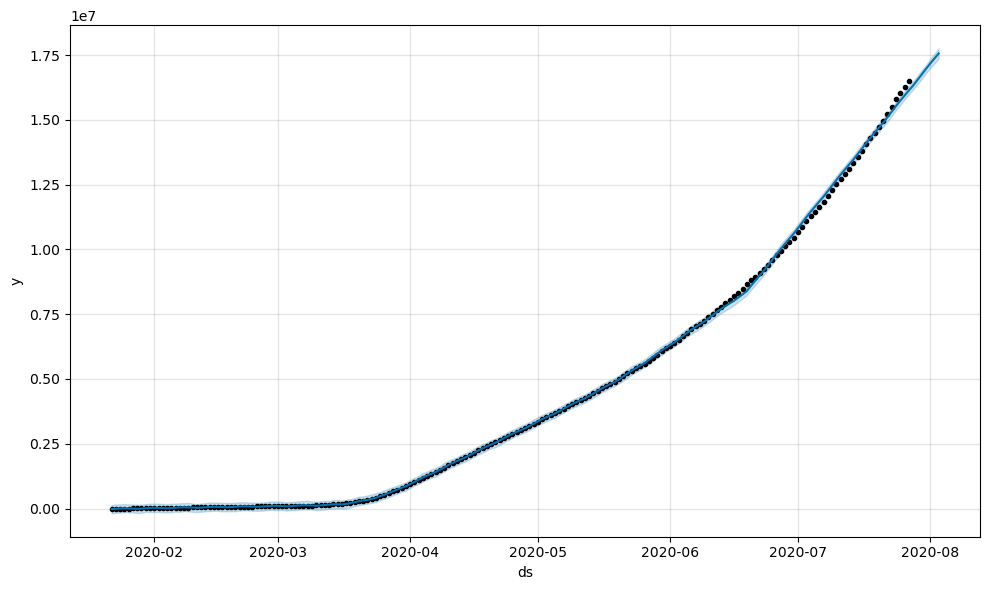

In [19]:
confirmed_forecast_plot = m.plot(forecast)

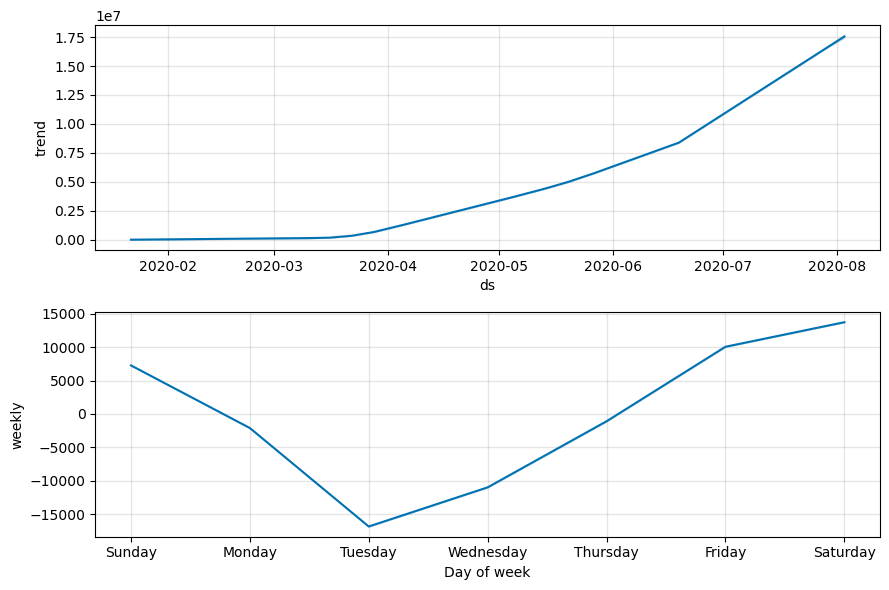

In [20]:
confirmed_forecast_plot = m.plot_components(forecast)

In [21]:
deaths.columns = ['ds','y']
deaths['ds']= pd.to_datetime(deaths['ds']) 

In [23]:
m=Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

20:25:12 - cmdstanpy - INFO - Chain [1] start processing
20:25:13 - cmdstanpy - INFO - Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [25]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,663509.697722,661405.653632,665562.577081
191,2020-07-31,669026.358583,666903.456609,671212.665366
192,2020-08-01,673909.343577,671652.637290,676199.312959
193,2020-08-02,678047.385907,675380.768505,680549.994782
194,2020-08-03,682337.962852,679335.695326,685145.603395


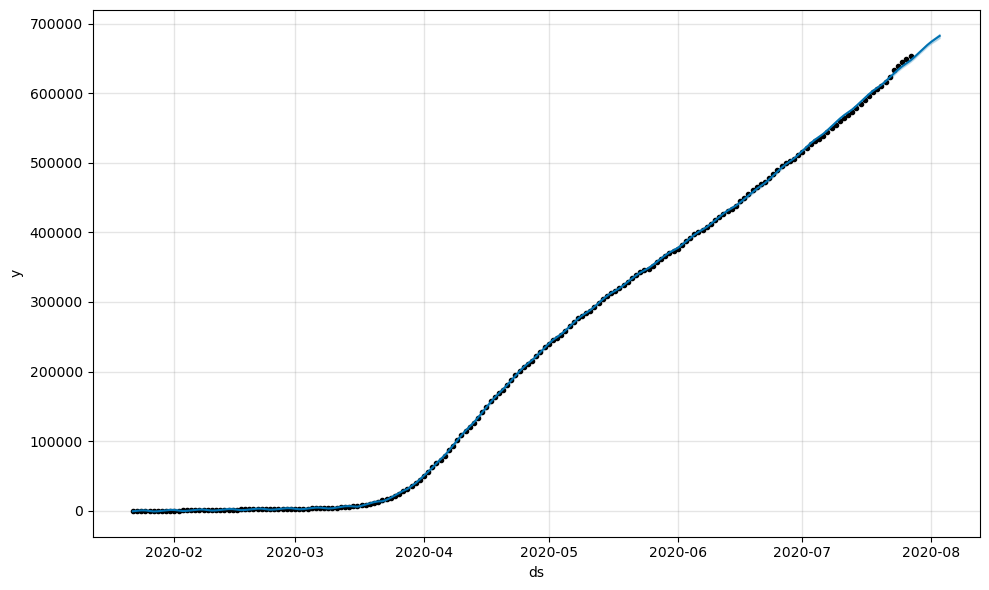

In [26]:
india_confirmed_plot =m.plot(forecast)

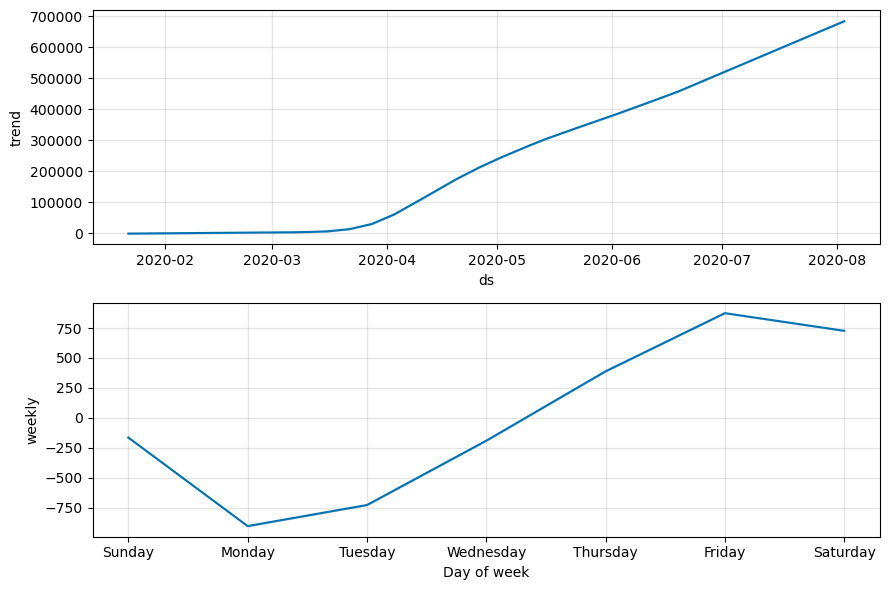

In [27]:
india_confirmed_plot=m.plot_components(forecast)